# EDA - Anikait Kapur

## Description
My EDA will focus on the efficecy of Lockdown comapred to the heard immmunity. Furthermore, I will also be breifly investigate whether or not a nationwide lockdown was a good way to fight covid-19. I will be focusing on India because it had one of the biggest nation wide lockdown during this pandemic. Furthermore, during its unlock phase, India implemented heard immunity alongside with minor measures such as masks and social distancing. 

## Importing Libraries and Loading Data

In [1]:
# Imported Items
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def loadingProcessing(path):
    data = (
        pd.read_csv(path)
    )

    return data
df = loadingProcessing("C:\\Users\\kapur\\Documents\\UBC\\1st Year\\1st Year Summer\\DATA 301\\Projectcopy\\project-group18-project\\data\\processed\\worldometers_snapshots_April18_to_September20.csv")
df

,Date,Country,Population,Total_Tests,Total_Cases,Total_Deaths,Total_Recovered,Active_Cases,New Cases,New Deaths,Percentage_Positive,S_C
0,2020-04-19,Afghanistan,39119903,6422,996,33,131,832,NaN,NaN,0.002546,NaN
1,2020-04-20,Afghanistan,39119903,6422,1026,36,135,855,NaN,NaN,0.002623,NaN
2,2020-04-21,Afghanistan,39119903,6422,1092,36,150,906,NaN,NaN,0.002791,NaN
3,2020-04-22,Afghanistan,39119903,6422,1176,40,166,970,NaN,NaN,0.003006,NaN
4,2020-04-23,Afghanistan,39119903,6422,1279,42,179,1058,NaN,NaN,0.003269,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
25333,2020-09-16,Zimbabwe,14911008,156133,7598,224,5823,1551,NaN,NaN,0.050956,NaN
25334,2020-09-17,Zimbabwe,14911008,157144,7633,224,5841,1568,NaN,NaN,0.051190,NaN
25335,2020-09-18,Zimbabwe,14911008,157144,7647,224,5883,1540,NaN,NaN,0.051284,NaN
25336,2020-09-19,Zimbabwe,14911008,157144,7672,225,5914,1533,NaN,NaN,0.051452,NaN


## Wranlging Data
- Isolating India and the data during the lockdown

In [2]:
df_India = df[df["Country"] == "India"]
df_India["Date"] = pd.to_datetime(df_India["Date"])
df_India_lockdown = df_India.head(44)
##I noticed that each row represents 1 day. Therefore, i figured out the number of days till the lockdown eneded from the start of the dataset

df_India_lockdown

C:\Users\kapur\miniconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,Date,Country,Population,Total_Tests,Total_Cases,Total_Deaths,Total_Recovered,Active_Cases,New Cases,New Deaths,Percentage_Positive,S_C
10936,2020-04-18,India,1383048851,335123,16365,521,2463,13381,0.0,NaN,0.001183,NaN
10937,2020-04-19,India,1383048851,401586,17615,559,2854,14202,1250.0,NaN,0.001274,NaN
10938,2020-04-20,India,1383048851,401586,18539,592,3273,14674,924.0,NaN,0.001340,NaN
10939,2020-04-21,India,1383048851,447812,20080,645,3975,15460,1541.0,NaN,0.001452,NaN
10940,2020-04-22,India,1383048851,462621,21370,681,4370,16319,1290.0,NaN,0.001545,NaN
10941,2020-04-23,India,1383048851,500542,23039,721,5012,17306,1669.0,NaN,0.001666,NaN
10942,2020-04-24,India,1383048851,541789,24447,780,5496,18171,1408.0,NaN,0.001768,NaN
10943,2020-04-25,India,1383048851,579957,26283,825,5939,19519,1836.0,NaN,0.001900,NaN
10944,2020-04-26,India,1383048851,625309,27890,881,6523,20486,1607.0,NaN,0.002017,NaN
10945,2020-04-27,India,1383048851,665819,29451,939,7137,21375,1561.0,NaN,0.002129,NaN


## Removing unwanted columns and adding new columns

In [3]:
percentage = (df_India_lockdown["Active_Cases"] / df_India_lockdown["Population"]) * 100
df_India_lockdown["%Active"] = percentage


def dailyCases():
    cases = list(df_India_lockdown["Total_Cases"])
    daily_cases = []
    for i in range(1,len(cases)):
        daily_cases.append((cases[i] - cases[i-1])) 
    daily_cases1 = [0]
    for i in range(0,len(daily_cases)):
        daily_cases1.append(daily_cases[i])
    df_India_lockdown["Daily_cases"] = daily_cases1
    
dailyCases()




df_India_lockdown1 = df_India_lockdown.drop(labels = ["Total_Deaths", "Total_Tests", "Population", "Total_Recovered","S_C","Active_Cases"], axis = 1)

df_India_lockdown1 = df_India_lockdown1.reset_index(drop = True)



df_India_lockdown1

C:\Users\kapur\miniconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,Date,Country,Total_Cases,New Cases,New Deaths,Percentage_Positive,%Active,Daily_cases
0,2020-04-18,India,16365,0.0,NaN,0.001183,0.000968,0
1,2020-04-19,India,17615,1250.0,NaN,0.001274,0.001027,1250
2,2020-04-20,India,18539,924.0,NaN,0.001340,0.001061,924
3,2020-04-21,India,20080,1541.0,NaN,0.001452,0.001118,1541
4,2020-04-22,India,21370,1290.0,NaN,0.001545,0.001180,1290
5,2020-04-23,India,23039,1669.0,NaN,0.001666,0.001251,1669
6,2020-04-24,India,24447,1408.0,NaN,0.001768,0.001314,1408
7,2020-04-25,India,26283,1836.0,NaN,0.001900,0.001411,1836
8,2020-04-26,India,27890,1607.0,NaN,0.002017,0.001481,1607
9,2020-04-27,India,29451,1561.0,NaN,0.002129,0.001545,1561


# Analysing the Data


## Research Questions:
   1. Did the lockdown in india have a postive effect on the new cases and deaths?
   2. Was herd immunity a viable option for dealing with Covid-19?





Given that the data is numerical for the most part, it would be good to get a summury of the data

In [4]:
df_India_lockdown1.describe(include=[np.number])

,Total_Cases,New Cases,New Deaths,Percentage_Positive,%Active,Daily_cases
count,44.000000,44.000000,9.000000,44.000000,44.000000,44.000000
mean,77564.136364,3960.090909,171.111111,0.005608,0.003321,3960.090909
std,51674.998196,2292.653929,74.041280,0.003736,0.001802,2292.653929
min,16365.000000,0.000000,0.000000,0.001183,0.000968,0.000000
25%,32627.500000,1827.250000,156.000000,0.002359,0.001685,1827.250000
50%,64984.500000,3597.000000,177.000000,0.004699,0.003087,3597.000000
75%,113577.500000,5919.000000,205.000000,0.008212,0.004620,5919.000000
max,190609.000000,8782.000000,269.000000,0.013782,0.006750,8782.000000


In [ ]:
#A scatter plot is a good visualisation of the daily new cases
print(df_India_lockdown1)




sns.set_style("whitegrid")
plot1 = sns.scatterplot(x = "Date", y = "Daily_cases", data = df_India_lockdown1)
#plot1.set(xlabel = "Months", ylabel = "Daily Cases", title = "Daily Cases plotted against months")
sns.set(rc = {'figure.figsize':(20,20)})
sns.despine(left=True, bottom=True)
plt.show()


This scatter plot clearly shows that during the lockdown period, there was consistant rise in daily cases. This in turn suggests that the lockdown did not have a positive effect on the daily cases. 

In [ ]:
sns.set_style("white") 
plot2 = sns.barplot(x = "Date", y = "%Active", data = df_India_lockdown1, )
plt.xticks(rotation=90)
sns.set(rc = {'figure.figsize':(20,10)})
sns.despine()

plt.show()


Much like the daily cases, the percentage postive cases are increasing. However, when looking at their quantitative value, during lockdown, the highest percentage positive population is less than 0.007% which in turn can be used as evidence that the lockdown possibly had a positive effective. 

# Herd Immunity

Herd Immunity can be investigated in a similar manner to the Lockdown.


In [7]:
df_herd = df[(df["Country"] == "India") | (df["Country"] == "USA")]
df_herd = df_herd.reset_index(drop = True)

df_herd_India = df_herd[df_herd["Country"] == "India"]
df_herd_US = df_herd[df_herd["Country"] == "USA"]


df_herd["Date"] = pd.to_datetime(df_herd["Date"])
df_Herd1 = df_herd[df_herd["Date"] > '2020-05-31']
df_Herd1.drop(labels = ["Total_Tests"], axis = 1,inplace = True)
df_Herd1["%Active"] = (df_Herd1["Active_Cases"]/df_Herd1["Population"]) * 100

df_Herd1 = df_Herd1.dropna().reset_index(drop = True)
df_Herd1.drop(labels = "Population", axis = 1, inplace = True)





def dailyDeaths_and_dailyCases(dataframe):
    df = dataframe
    cases = list(df["Total_Deaths"])
    daily_cases = []
    for i in range(1,len(cases)):
        daily_cases.append((cases[i] - cases[i-1])) 
    daily_cases1 = [0]
    for i in range(0,len(daily_cases)):
        daily_cases1.append(daily_cases[i])
    df["Daily_deaths"] = daily_cases1
    cases = list(df["Total_Cases"])
    daily_cases = []
    for i in range(1,len(cases)):
        daily_cases.append((cases[i] - cases[i-1])) 
    daily_cases1 = [0]
    for i in range(0,len(daily_cases)):
        daily_cases1.append(daily_cases[i])
    df["Daily_cases"] = daily_cases1
    return df


df_herd_India = dailyDeaths_and_dailyCases(df_herd_India)
df_herd_US = dailyDeaths_and_dailyCases(df_herd_US)



##The lockdown in India ended on May 31. Therefore, will be looking at data after that date.


C:\Users\kapur\miniconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\kapur\miniconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


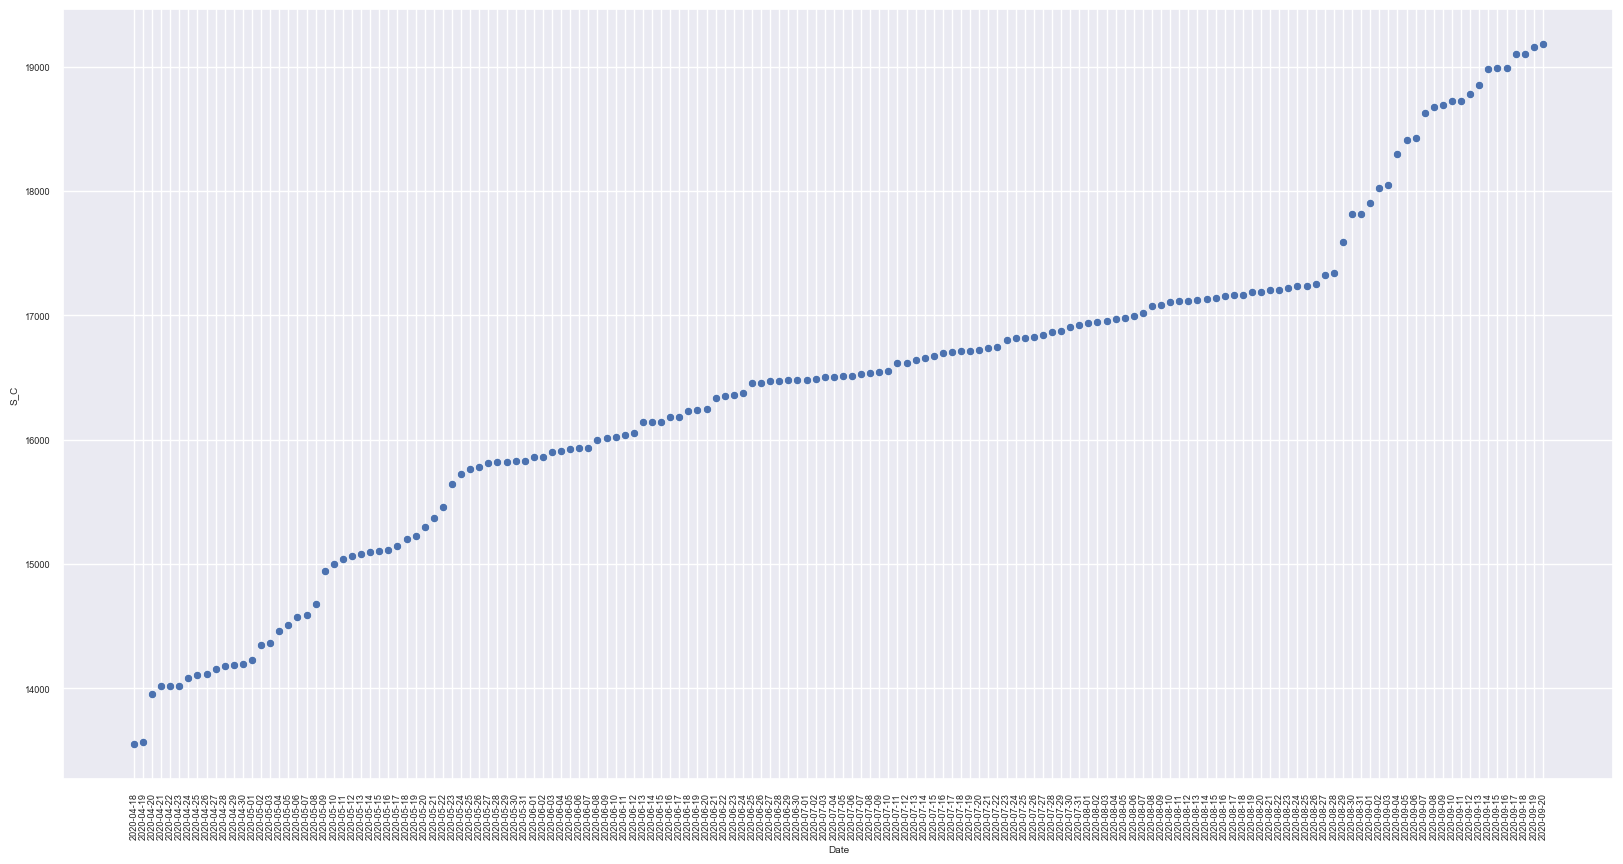

In [8]:
sns.set_style("white")
sns.set(font_scale = 0.6)
plot2 = sns.scatterplot(x = "Date", y = "S_C", data = df_herd_US)
plt.xticks(rotation=90)
sns.set(rc = {'figure.figsize':(20,20)})
plt.show()

From the above graph, we can see a rought patten in the serious and critical cases for the US. We see a up and down patten for the US which suggests that there must be some extrnal factors. For India, the serious and critical cases remain constant which suggests the combination of lockdown as well as herd immunity is an effective techinque. 

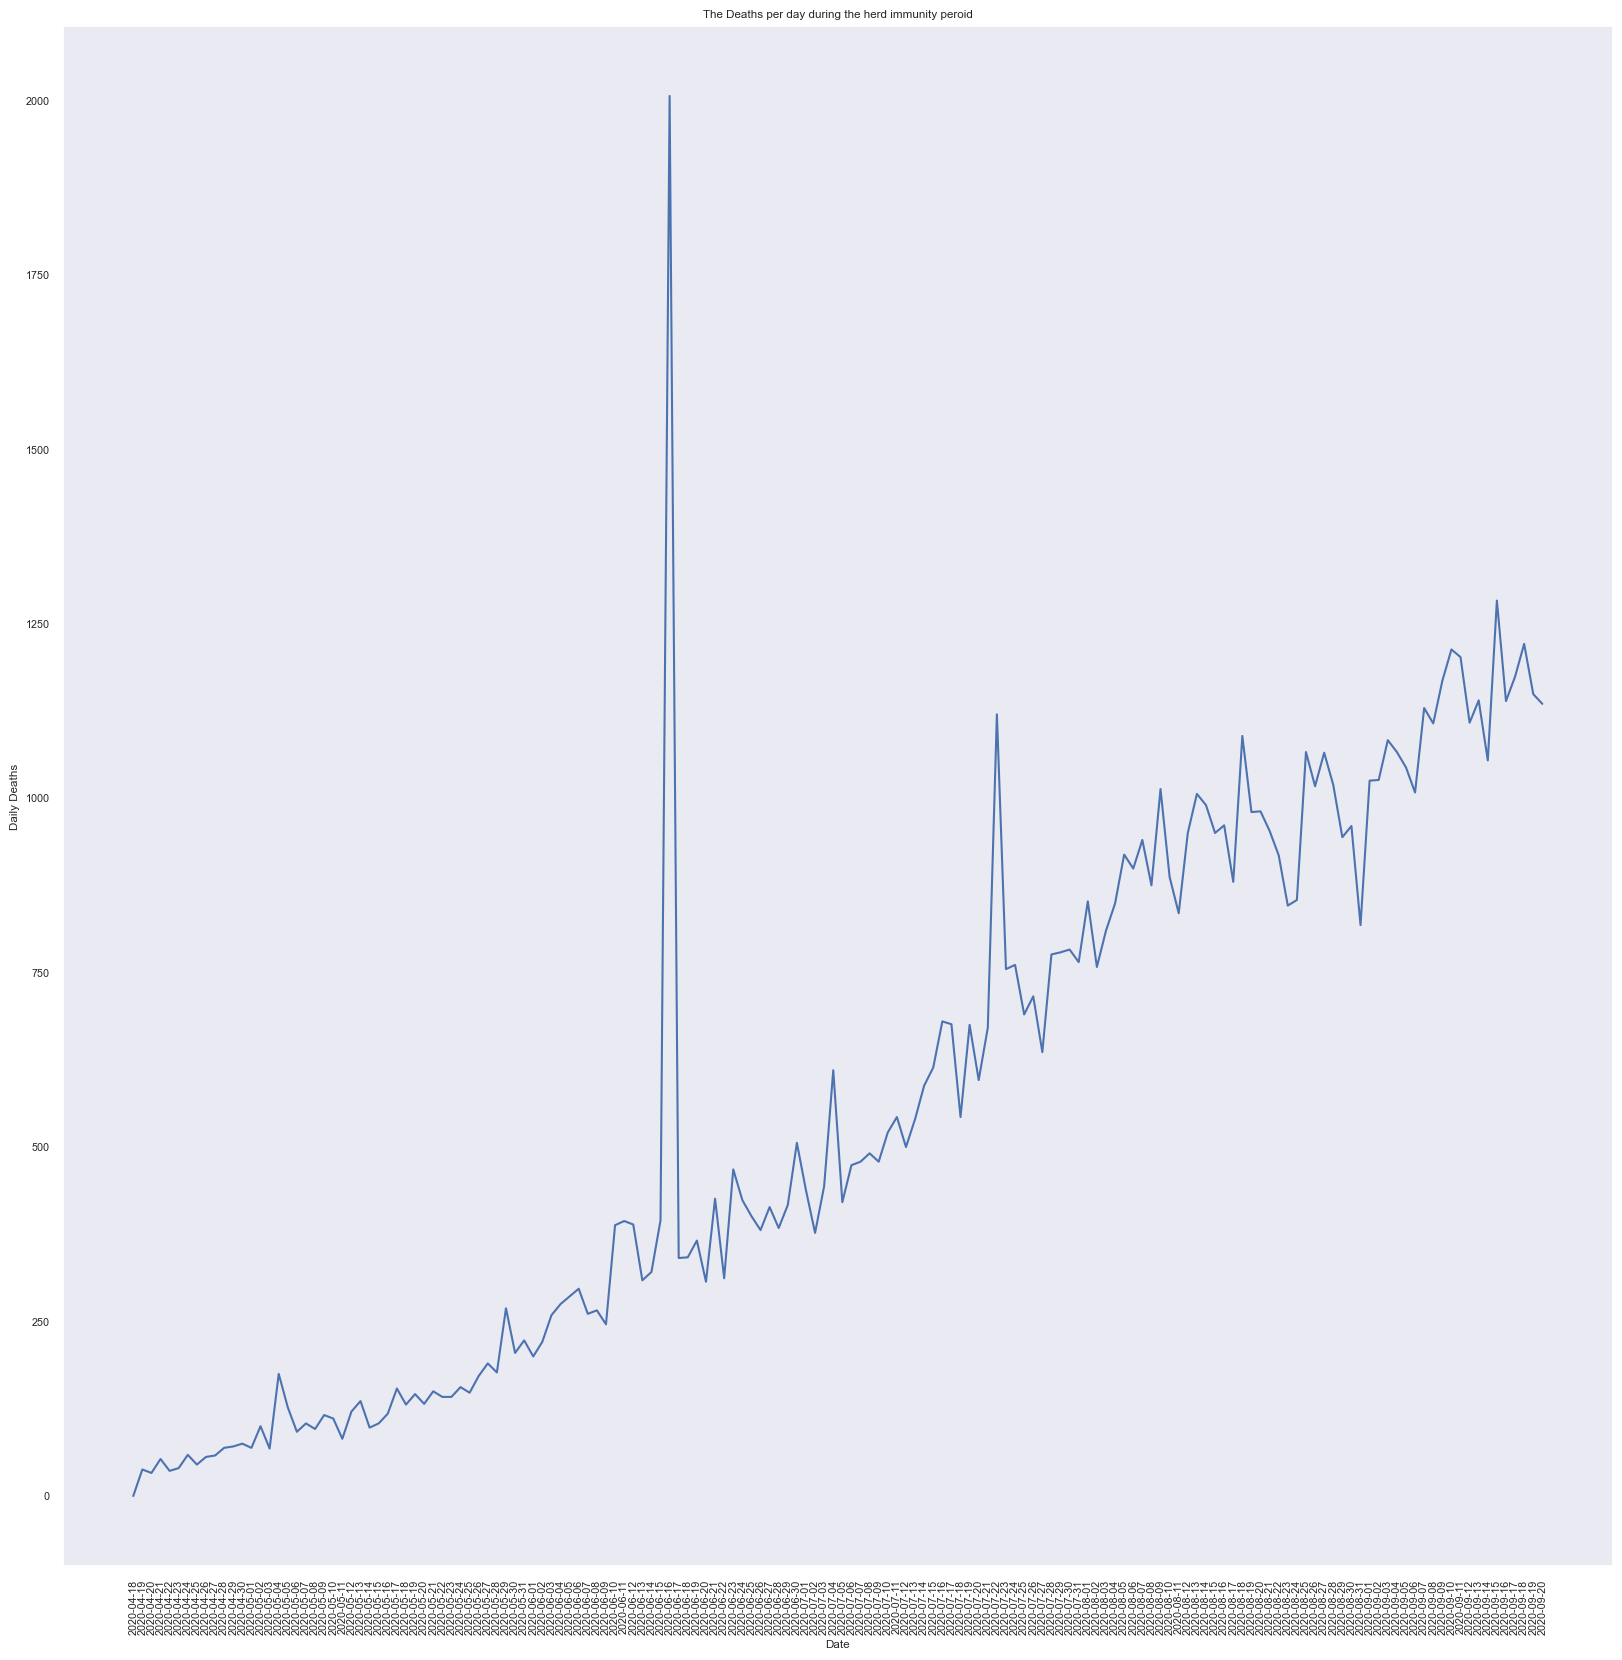

In [9]:
sns.set(font_scale = 0.7)
sns.set_style("dark") 
#print(set(pd.DatetimeIndex(df_India_Herd['Date']).month))
plot1 = sns.lineplot(x = "Date", y = "Daily_deaths", data = df_herd_India, legend = "full")
plot1.set(xlabel = "Date",ylabel = "Daily Deaths", title = "The Deaths per day during the herd immunity peroid" )
plt.xticks(rotation=90)
sns.set(rc = {'figure.figsize':(20,10)})
plt.show()

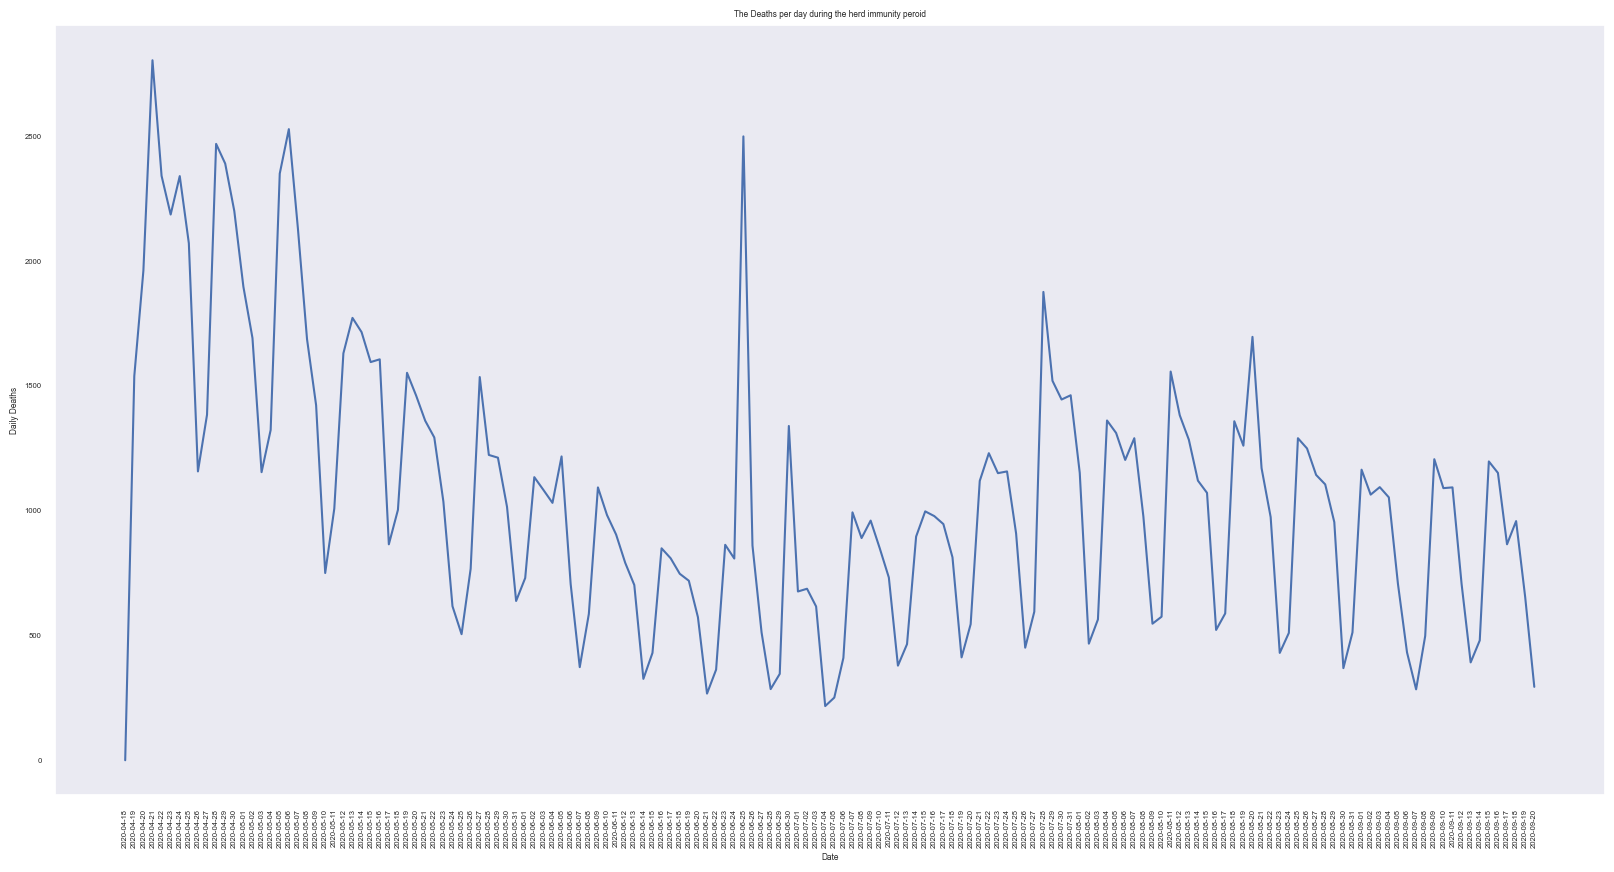

In [10]:
sns.set(font_scale = 0.5)
sns.set_style("dark") 
#print(set(pd.DatetimeIndex(df_India_Herd['Date']).month))
plot1 = sns.lineplot(x = "Date", y = "Daily_deaths", data = df_herd_US, legend = "full")
plot1.set(xlabel = "Date",ylabel = "Daily Deaths", title = "The Deaths per day during the herd immunity peroid" )
plt.xticks(rotation=90)
sns.set(rc = {'figure.figsize':(20,10)})
plt.show()

I used the deaths because they are a good indicator of people's immunity. The more immune people are to covid-19, the less deaths there would be.

Both India and US saw spikes in the number of deaths. However, the magnitude of the US' spikes gradually decreases as time goes on. Furthermore, while India's daily cases have rising trend, it is increseing at a decreasing rate. Both of these suggests that during the herd immunity period, immunity against covid-19 increased. 

           Date  Total_Cases  Total_Deaths  New Cases  New Deaths  \
0    2020-04-18        16365           521        0.0         NaN   
1    2020-04-19        17615           559     1250.0         NaN   
2    2020-04-20        18539           592      924.0         NaN   
3    2020-04-21        20080           645     1541.0         NaN   
4    2020-04-22        21370           681     1290.0         NaN   
..          ...          ...           ...        ...         ...   
151  2020-09-16      5115893         83230    97859.0      1139.0   
152  2020-09-17      5212686         84404    96793.0      1174.0   
153  2020-09-18      5305475         85625    92789.0      1221.0   
154  2020-09-19      5398230         86774    92755.0      1149.0   
155  2020-09-20      5485612         87909    87382.0      1135.0   

     Percentage_Positive  Daily_deaths  Daily_cases  
0               0.001183             0            0  
1               0.001274            38         1250  
2        

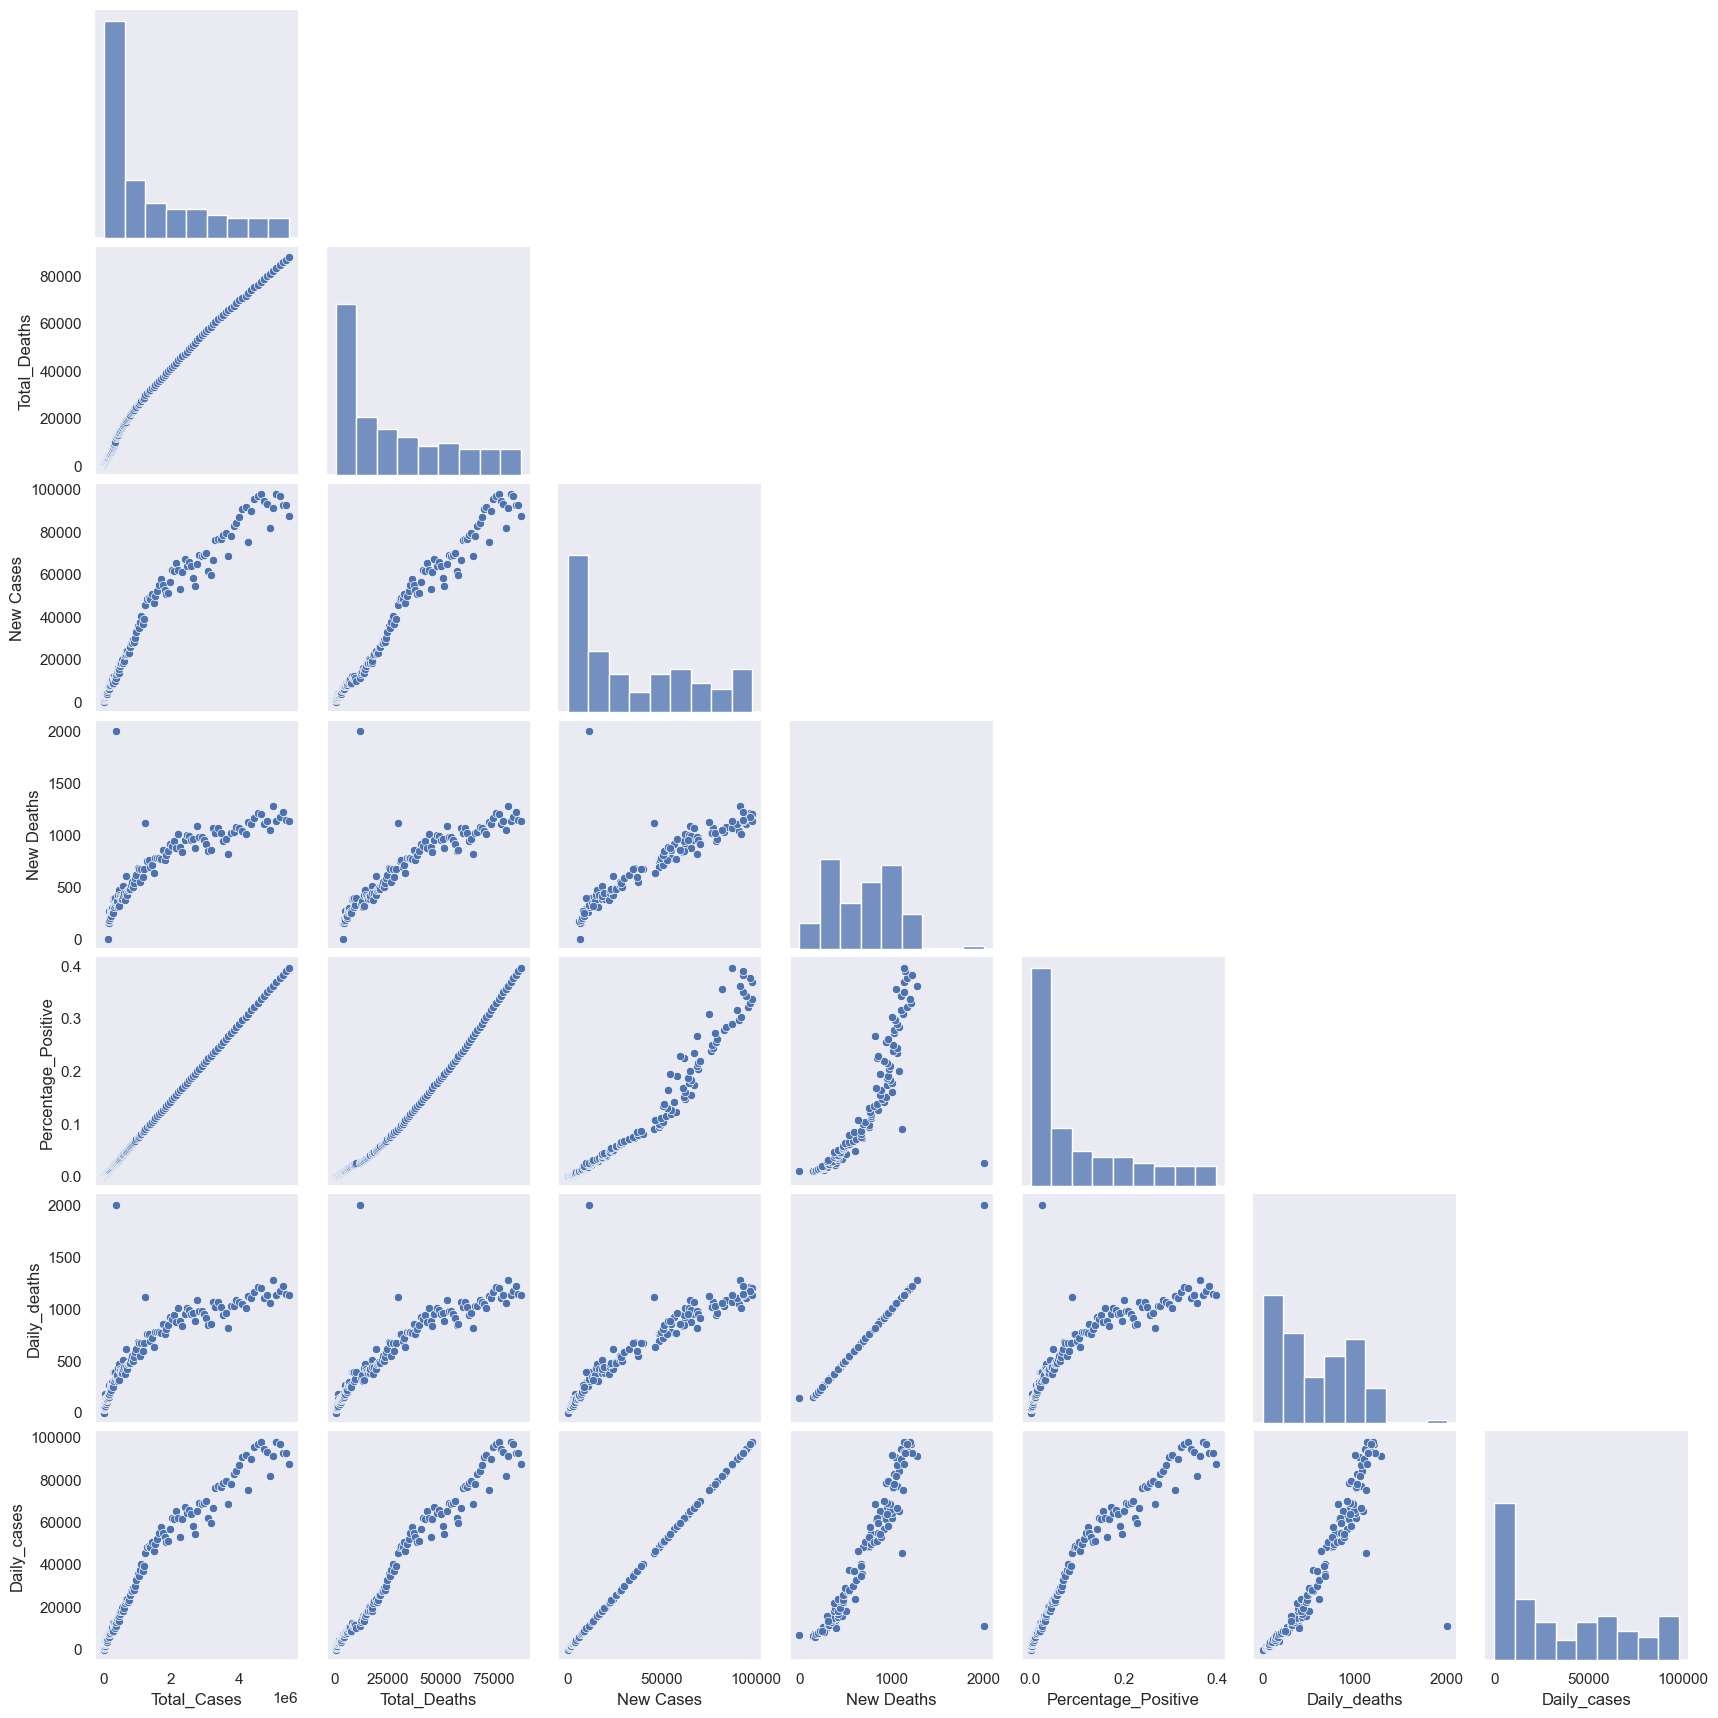

In [11]:

df_India_Herd_temp = df_herd_India
sns.set_style("dark")
df_India_Herd_temp = df_India_Herd_temp.drop(labels = ["Active_Cases", "Country", "S_C", "Population", "Total_Recovered", "Total_Tests"], axis =1 )
print(df_India_Herd_temp)

sns.pairplot(data = df_India_Herd_temp, kind = "scatter", diag_kind = "hist", corner = True)
plt.show()

# Conclusion



Research Question 1: 

From the first two graphs, it was pretty evident the number of cases were increasing during the lockdown. Looking at the scatter graph of daily cases, a steady increase in cases as well as a postive correlation can be seen. Both of these factors are evidence that suggests that the lockdown was not able to stop the speard of covid-19 however, it was able to limit it. This is seen from the bar plot with %Active cases. While the %Active also increaed at a steady rate, during the lockdown, the percantage maxed out at 0.007% which is very miniscule.




Research Question 2:

Herd Immunity, although, was not able to fully stop covid-19, it was able to limit the spread as well as increase immunity. Looking at the scatter graph comparing the critial and serious cases, we see that on the larger scale, the US does see a decrease in serious and critial cases. This suggests that herd immunity was indeed effective in fighting against covid-19. The line graphs for the daily deaths also shows a similar results. For the US, we see an overal decrease in the magnitude of the spikes in the daily deaths. In case of India, it can be seen that while the number of daily deaths increase, the rate of increase decreases slightly. This suggests that Herd Immunity increased people's immunity which in turn is evidence that it is indeed a viable way of dealing with covid-19. Further evidence of this is seen through the pairplot. In the pairplot, we see from Daily_cases vs Daily_deaths that daily cases saw a much greater increase than the daily deaths which in turn suggests greater immunity. Furthermore, we see a significant decrease in the graident of Total_Deaths vs Daily_deaths which suggests that in the grand scheme of things, the number of deaths decreased.

In [12]:
df_India_lockdown1

,Date,Country,Total_Cases,New Cases,New Deaths,Percentage_Positive,%Active,Daily_cases
0,2020-04-18,India,16365,0.0,NaN,0.001183,0.000968,0
1,2020-04-19,India,17615,1250.0,NaN,0.001274,0.001027,1250
2,2020-04-20,India,18539,924.0,NaN,0.001340,0.001061,924
3,2020-04-21,India,20080,1541.0,NaN,0.001452,0.001118,1541
4,2020-04-22,India,21370,1290.0,NaN,0.001545,0.001180,1290
5,2020-04-23,India,23039,1669.0,NaN,0.001666,0.001251,1669
6,2020-04-24,India,24447,1408.0,NaN,0.001768,0.001314,1408
7,2020-04-25,India,26283,1836.0,NaN,0.001900,0.001411,1836
8,2020-04-26,India,27890,1607.0,NaN,0.002017,0.001481,1607
9,2020-04-27,India,29451,1561.0,NaN,0.002129,0.001545,1561


In [13]:
df_herd

,Date,Country,Population,Total_Tests,Total_Cases,Total_Deaths,Total_Recovered,Active_Cases,New Cases,New Deaths,Percentage_Positive,S_C
0,2020-04-18,India,1383048851,335123,16365,521,2463,13381,0.0,NaN,0.001183,NaN
1,2020-04-19,India,1383048851,401586,17615,559,2854,14202,1250.0,NaN,0.001274,NaN
2,2020-04-20,India,1383048851,401586,18539,592,3273,14674,924.0,NaN,0.001340,NaN
3,2020-04-21,India,1383048851,447812,20080,645,3975,15460,1541.0,NaN,0.001452,NaN
4,2020-04-22,India,1383048851,462621,21370,681,4370,16319,1290.0,NaN,0.001545,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
307,2020-09-16,USA,331441624,94369067,6828301,201348,4119158,2507795,40154.0,1151.0,2.060182,18992.0
308,2020-09-17,USA,331441624,95235022,6874596,202213,4155039,2517344,46295.0,865.0,2.074150,19098.0
309,2020-09-18,USA,331441624,96223461,6925941,203171,4191894,2530876,51345.0,958.0,2.089641,19100.0
310,2020-09-19,USA,331441624,97310312,6967403,203824,4223693,2539886,41462.0,653.0,2.102151,19155.0
